# ETL Pipeline Preparation
The Following code creates the ETL pipeline that generates the processed data for the Machine learning Algorithm
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `data/EURUSD_M1.csv` into a dataframe 1 Minute Transaction.
- Load `data/EURUSD_M5.csv` into a dataframe 5 Minute Transaction.
- Load `data/EURUSD_M15.csv` into a dataframe 15 Minute Transaction.
- Load `data/EURUSD_M30.csv` into a dataframe 30 Minute Transaction.

In [1]:
# Import pandas Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the datasets 
df_M1 = pd.read_csv("data/EURUSD_M1.csv")
df_M5 = pd.read_csv("data/EURUSD_M5.csv")
df_M15 = pd.read_csv("data/EURUSD_M15.csv")
df_M30 = pd.read_csv("data/EURUSD_M30.csv")

In [8]:
def split_data(df):
    """Splits the dataset in to columns and process the timestamp to day, month and year
    INPUT: (pandas dataframe) trade dataset with single joined column separated by \t
    OUTPUT: (pandas dataframe) trade dataset with multiple column that containing Time, Open, High, Low, Close
    """    
    columns = df_M1.columns[0].split("\t")
    # create a dataframe of the merged data
    df = df[df.columns[0]].str.split('\t', expand=True)
    df.columns = columns
    df['Open'] = pd.to_numeric(df['Open'])
    df['Close'] = pd.to_numeric(df['Close'])
    df['High'] = pd.to_numeric(df['High'])
    df['Low'] = pd.to_numeric(df['Low'])
    df['Diff']= df['Close'] - df['Open']
    df['Time'] = pd.to_datetime(df['Time']) 
    df['Day'] = df.Time.apply(lambda x: x.day)
    df['Month'] = df.Time.apply(lambda x: x.month)
    df['Year'] = df.Time.apply(lambda x: x.year)
    
    return df   

In [9]:
df = split_data(df_M1)
df.head()

,Time,Open,High,Low,Close,Volume,Diff,Day,Month,Year
0,2020-04-27 04:40:00,1.08418,1.08419,1.08405,1.08412,154,-0.00006,27,4,2020
1,2020-04-27 04:41:00,1.08413,1.08426,1.08412,1.08422,67,0.00009,27,4,2020
2,2020-04-27 04:42:00,1.08422,1.08422,1.08415,1.08420,64,-0.00002,27,4,2020
3,2020-04-27 04:43:00,1.08420,1.08420,1.08412,1.08413,61,-0.00007,27,4,2020
4,2020-04-27 04:44:00,1.08414,1.08425,1.08414,1.08421,98,0.00007,27,4,2020


In [10]:
df['Diff'].max()

0.002389999999999892

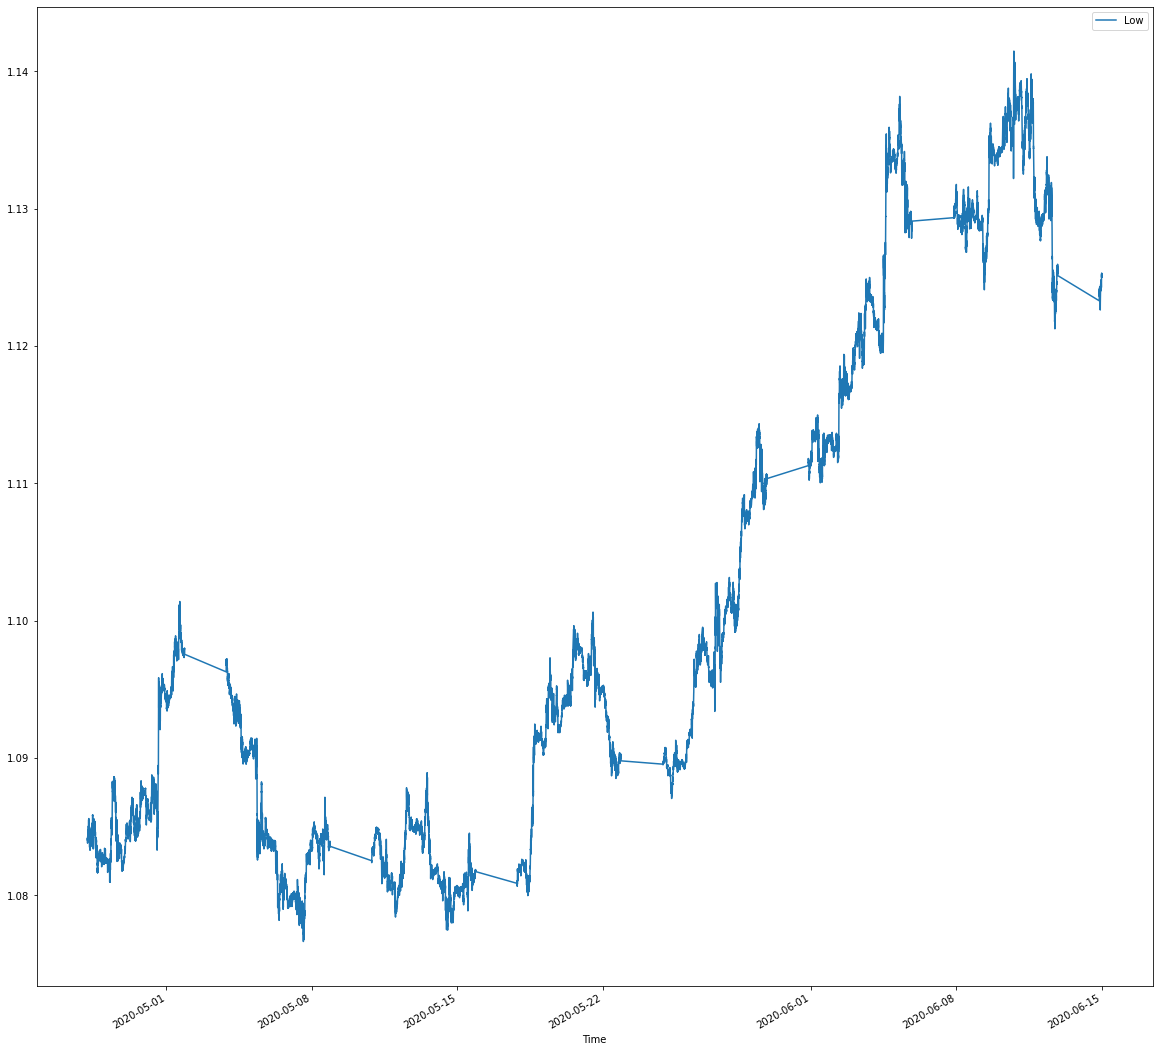

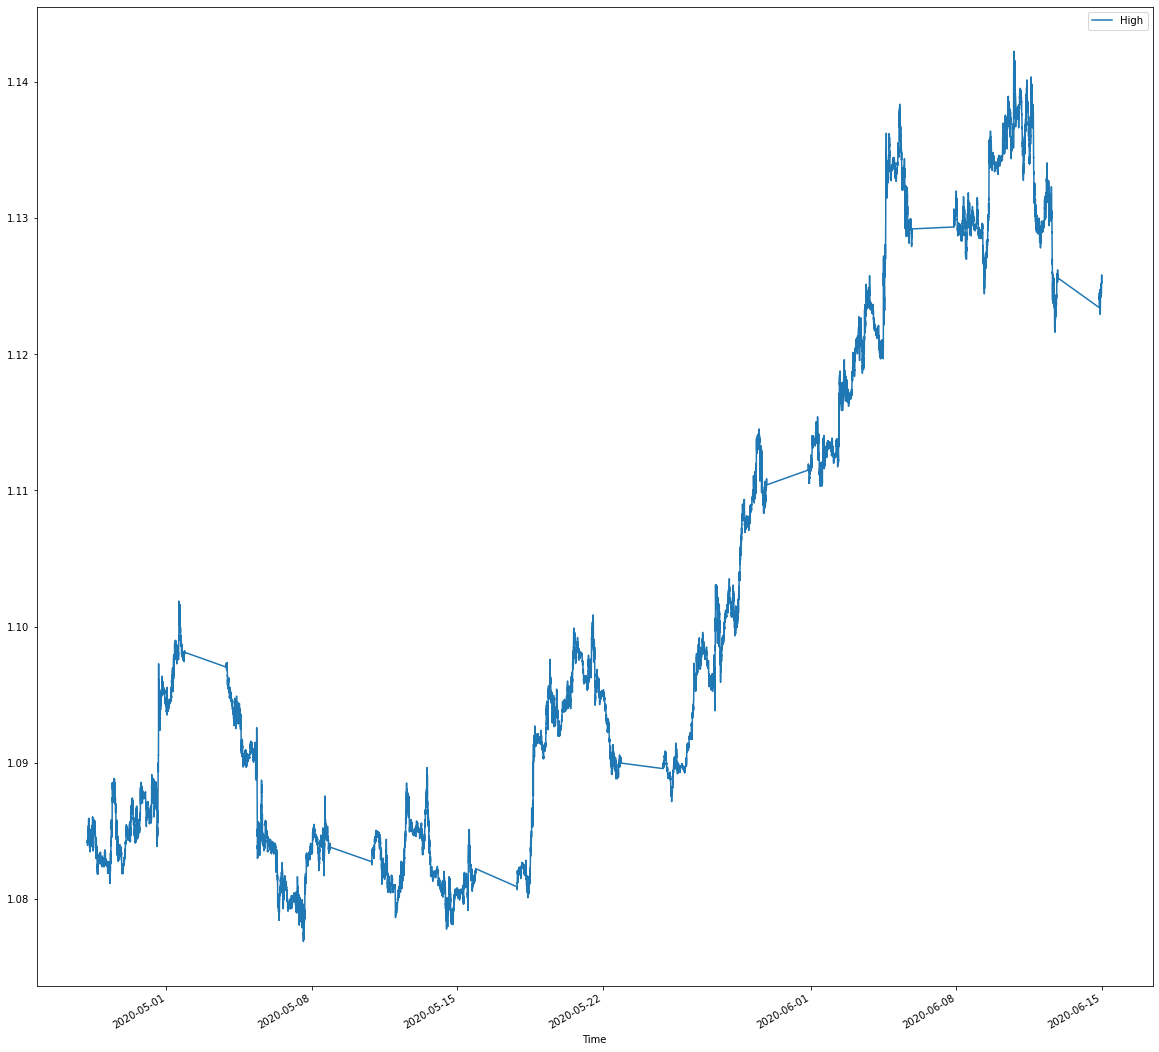

In [5]:
df.plot(x ='Time', y='Low', kind = 'line', figsize=(20,20))
df.plot(x ='Time', y='High', kind = 'line', figsize=(20,20))
plt.show()

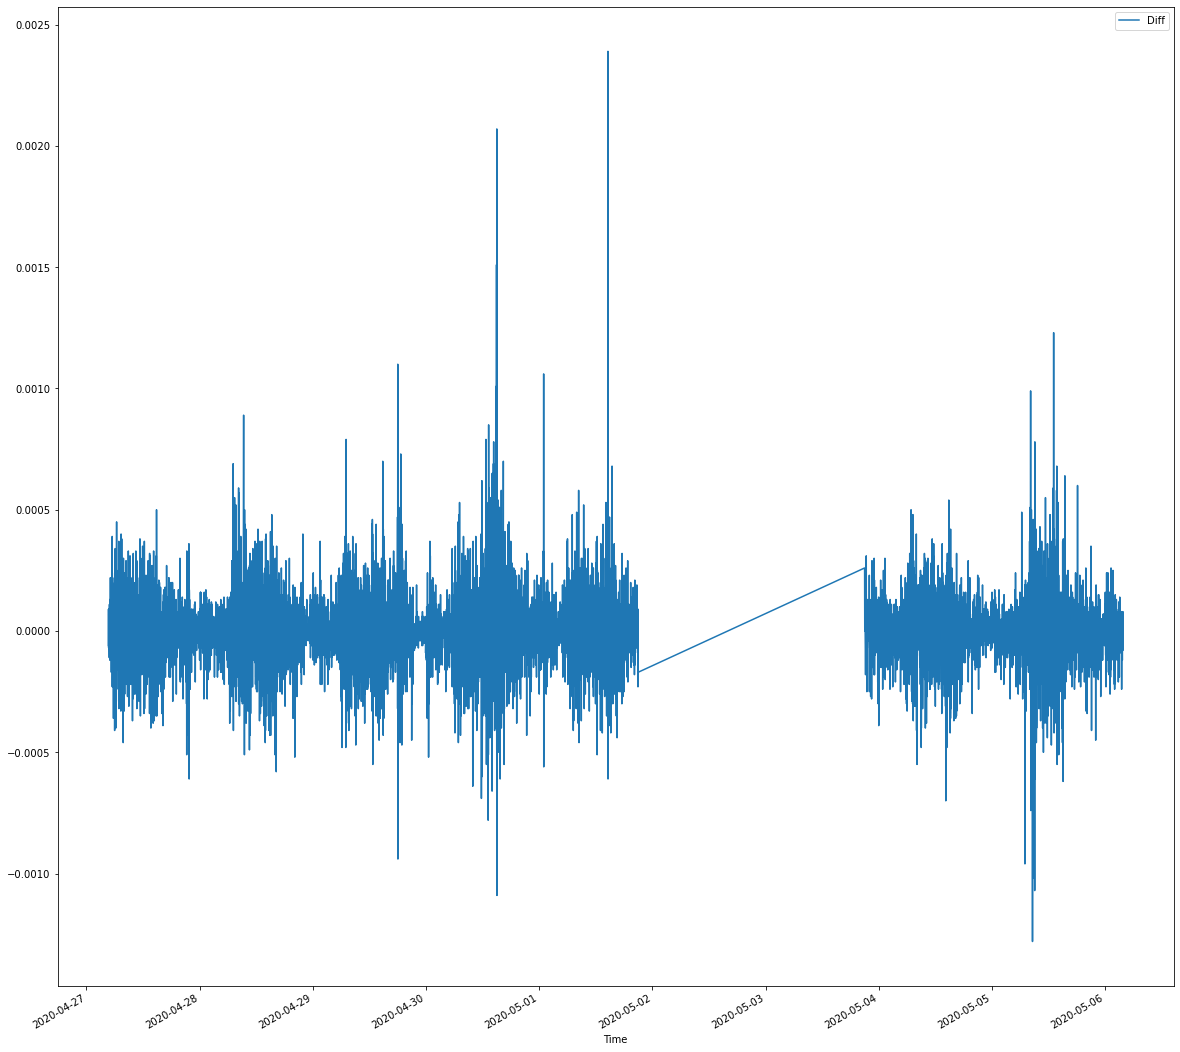

In [17]:
df_short = df.head(10000) 
df_short.plot(x ='Time', y='Diff', kind = 'line', figsize=(20,20))
plt.show()

In [6]:
import numpy as np

In [194]:
def sliding_window(df, size=10, padding=5, col='Close'):
    """from given dataset generate x and y of the reqired paramenter to predict"""
    x, y = list(), list()
    for i in range(0, int((df.size+padding)/size), padding):
        x_val = df.iloc[i:i+size]
        y.append(x_val.iloc[size-1][col])        
        x_val = x_val[['Open', 'High', 'Low', 'Volume', 'Close']]
        x_flattened = [list(row) for i, row in x_val.iterrows()]
        x_flattened[-1][-1] = 0
        np.asarray(x.append(np.asarray(x_flattened)))
    return x, y
        

In [195]:
x, y = sliding_window(df.copy())

In [200]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [201]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [202]:
x =  [xe.flatten() for xe in x]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [203]:
regr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [204]:
y_pred = regr.predict(x_test)

In [212]:
error = np.sqrt(np.sum((y_pred - y_test)**2)) 

In [213]:
error

1.0396824381030965

In [219]:
x_test[0].reshape((1,x_test[0].shape[0]))

array([['1.12429', '1.1243', '1.1242', '14', '1.12429', '1.12428',
        '1.12438', '1.1242299999999998', '29', '1.12425', '1.12429',
        '1.1257700000000002', '1.12429', '354', '1.1253', '1.12537',
        '1.1256', '1.12499', '339', '1.12501', '1.125', '1.12504',
        '1.1249200000000001', '143', '1.12494', '1.12494', '1.12494',
        '1.12474', '106', '1.1248', '1.1248', '1.1249', '1.12465', '112',
        '1.1247200000000002', '1.12473', '1.12485', '1.12467', '125',
        '1.12468', '1.12468', '1.12475', '1.12461', '183',
        '1.1246200000000002', '1.1246200000000002', '1.12465',
        '1.1244399999999999', '142', '0']], dtype='<U32')

In [220]:
regr.predict(x_test[0].reshape((1,x_test[0].shape[0])))

array([1.10717])

In [221]:
y_test[0]

1.12449